<h1><center> Using Statistics to Identify Spam </center></h1>
<h3><center> Bin Yu, Nuoya Rezsonya, Yejur Singh Kunwar, Iram Bakhtiar</center></h3>

# Question


You have the option to choose one (and only one) of the following problems from the back of chapter 3 (<a href="http://rdatasciencecases.org/">http://rdatasciencecases.org/</a>): 19, 20, or 21 instead of the case study mentioned at the end of module 6.8.

- Q.19 Consider the other parameters that can be used to control the recursive partitioning
    process. Read the documentation for them in the rpart.control() documentation. Also,
    carry out an Internet search for more information on how to tweak the rpart() tuning
    parameters. Experiment with values for these parameters. Do the trees that result make
    sense with your understanding of how the parameters are used? Can you improve the
    prediction using them?

# Contents

1. [Abstract](#Abstract)
2. [Introduction](#Introduction)
3. [Background](#Background)
4. [Methods](#Methods)
5. [Results](#Results)
6. [Conclusion](#Conclusion)
7. [References](#References)
8. [Appendix: Code](#Appendix)

# Abstract


[Back to Contents](#Contents)

# Introduction

At the very beginning of Internet, sending out commercial emails were not allowed. The first email spam was sent by Gary Thuerk in 1978 and 600 people received it. Email Spams has steadily grown since the early 1990s, and by 2014 spams has been estimated that it made up around 90% of email messages sent. Most of email spams are commercial in nature. Because of the expense of the spam is borne mostly by the person who receives it, it forms a perfect example of negative externality. 
Every Email service provider has used anti-spam techniques to filter and refuse spam based on the content of the email. Spam detection is a classification problem, either Spam or not. In this project, we will build our own Spam filter with the dataset that has been utilized in the book of Data Science in R: A Case Studies Approach to Computational Reasoning and Problem Solving [1] (“the book” in the followings).



[Back to Contents](#Contents)

# Background


In order to build our own Spam filter, we use a dataset that has also been utilized in the book [1]. The dataset has more than 9000 emails that have been manually classified as Spam or not Spam by SpamAssassin[2] to make models. In the book [1], the dataset has been processed to add structure. We are using the same steps to clean up the data by regrouping them into header, body content and attachments (if any). This process will be automated by writing functions and then later being used on the whole dataset. Once the dataset has been processed, all unique words will be used to build a word dictionary which the frequency of words in Spam versus not Spam will be calculated. This process contributes to the establishment of the Spam detection classifier.

We are also required to explore rpart library in R so that we can build an improved decision tree model and understand how each parameter affects the decision tree outcome by tuning each of them. In the followings, we will tune one parameter at a time, visualize and analyze the change in the tree outcome, then finish the project by tuning all parameters to provide a better decision tree model.

[Back to Contents](#Contents)

# Methods

**1. Classification Metrics**

Before we jump into the parameter tuning and modelling, we have to decide the performance metrics to evaluate how well the model performs. As we mentioned above Spam detection is a classification problem, a good performance is that the model can get as few as false positive and false negative as possible. Common classification metrics are accuracy, precision, recall and F1 score. 

**Accuracy**: The ratio of number of correct predictions to the total number of predictions made. But it only works well when there are equal number of samples in each class. 

<center><img src="accuracy.png"> <center>
    
**Precision**: The ratio of the number of correct positives to the number of positive results predicted by the model.

<center><img src="precision.png"> <center>
    
**Recall**: The ratio of the number of correct positives to the number of all samples that should have been tagged as positive)

<center><img src="recall.png"> <center>
	
**F1 Score**: It is the harmonic mean between precision and recall. It is trying to find the balance between precision and recall. F1 score is a number that is between 0 and 1. It indicates how precise and robust our model is. A high F1 score should be preferred. 

<center><img src="f1.png"><center> 


**2. Rpart Library**

In this project we are using Rpart to create a decision tree. In R, the Rpart library (Recursive Partitioning and Regression Trees) is the algorithm implementation of the CART algorithm (Classification and Regression Trees). Decision trees use gini index as metric to evaluate the splits and determine features that have the greatest significance. A Gini score gives an idea of how good a split is by how mixed the classes are in the two groups created by the split. Gini score is calculated as[3] 
<center><img src="gini_score.png">

The rpart.control() is the control details of rpart algorithm which we have a list of various parameters that control aspects if rpart fit. There are 9 parameters that can be tuned to achieve different outcomes and we will talk about the most important ones that we have searched on the Internet. 


**1. Minsplit**

The minimum number of observations in the parent node that must exist in a node in order for a split to be attempted. In other words, the number of observations in one child node.  For example, in R, this value is 20 by default, if there is any node that has less than 20 observations, it will be tagged as a terminal node and no split could happen. [4][5] Thermionically, if nothing is given to minsplit at all, not even that default value 20, the tree will go on forever till there is no observation left in a node to split. It is a parameter that prevents the algorithm from overfitting.  (Here I need some plot, something current cell 57 to show the relationship between minsplit and split). Maybe number of minsplits increases, number of splits decreases. 

**2. Minbucket**

The smallest number of observations that are allowed in a terminal node. If a split decision breaks the data into a node with less than the given minbucket, it will not happen. It sounds very similar to minsplit. While minsplit informs the algorithm the number of observations the split could happen, the minbucket tells when to tag a node as terminal node. There is a relationship between minsplit and minbucket that If only one of minbucket or minsplit is specified, the code either sets minsplit to minbucket*3 or minbucket to minsplit/3, as appropriate [4][5]. Again, this parameter is just like minsplit, it prevents the algorithm from overfitting by limiting the number of child nodes that can exist in a tree. (I also need some plot for this part)

**3. Cp**

Complexity parameter is a stopping parameter. It speeds up the search for splits since it locates the splits that do not meet up with the criteria. The complexity parameter (cp) in rpart is the minimum improvement in the model needed at each node. It’s based on the cost complexity of the model defined as
<center><img src="cp.png">
    
It adds up the misclassification at every terminal node in a tree. Then it multiplies the number of the splits with a penalty term lamda. After this, add it to the total misclassification. This lamda is achieved by cross-validation. In R, if we use printcp(), it will show a scaled version of lamda over the misclassification rate of overall data[6]. Therefore, a smaller value will make the tree more complex. A max value is 1 and it creates a tree with zero splits. (plots needed)

**4. maxdepth**

It is used to set the maximum depth of any node of the final tree. In other words, it tells the algorithm, how many levels from a root node it can go down. For example, if we have set the maxdepth as 2, the tree can go down at most two levels. (plots needed) Therefore, finding the balance of this value is needed. If a low maxdepth value is given to the algorithm, the tree will be relatively shallow and only identify the features that have greatest impact on the model. On the other hand, if a large value is given, the tree will be improved till the point that the tree will go too long and has overfitting problem. (plots needed to show the concept)

**5. xval**

This parameter is simply the number of cross validations we need to perform on the dataset. Cross validation is always preferred in any data science project. It is a great way to train the model on several datasets partitioned into k-folds and then test it on the test set. This process contributes to improve the model performance. Normally it is a value between 5 and 10, although we use 10 folds valuation most of the time.


[Back to Contents](#Contents)

# Results


[Back to Contents](#Contents)

# Conclusion

[Back to Contents](#Contents)

# References

1. https://www.rdocumentation.org/packages/rpart/versions/4.1-15/topics/rpart.control
2. https://www.rdocumentation.org/packages/rpart/versions/4.1-15/topics/rpart
3. https://www.gormanalysis.com/blog/decision-trees-in-r-using-rpart/
4. https://www.datanovia.com/en/blog/ggplot-title-subtitle-and-caption/




[Back to Contents](#Contents)


# Appendix

[Back to Contents](#Contents)

## Code 

In [1]:
# install.packages("tm", dependencies=TRUE, repos='http://cran.rstudio.com/')
# above may not working very well, you can use conda to install in your jupyter environment.
# conda install r-tm
# install.packages("rpart", dependencies=TRUE, repos='http://cran.rstudio.com/')
# install.packages("rpart.plot", dependencies=TRUE, repos='http://cran.rstudio.com/')
# install.packages("MLmetrics", dependencies=TRUE, repos='http://cran.rstudio.com/')
# install.packages("naivebayes", dependencies=TRUE, repos='http://cran.rstudio.com/')
# install.packages("xgboost", dependencies=TRUE, repos='http://cran.rstudio.com/')
# install.packages("Rcpp", dependencies=TRUE, repos='http://cran.rstudio.com/')
# install.packages("plotly", dependencies=TRUE, repos='http://cran.rstudio.com/')
# install.packages("R.utils", dependencies=TRUE, repos='http://cran.rstudio.com/')
# install.packages("readtext", dependencies=TRUE, repos='http://cran.rstudio.com/')
# install.packages("filesstrings", dependencies=TRUE, repos='http://cran.rstudio.com/')

In [2]:
# import libraries

library(NLP)
library(tm)
library(RColorBrewer)
library(rpart)
library(rpart.plot)
library(RColorBrewer)
library(caret)
library(MLmetrics)
library(naivebayes)
library(e1071)
library(randomForest)
library(xgboost)
library(R.utils)
library(readtext)
library(filesstrings)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'ggplot2'

The following object is masked from 'package:NLP':

    annotate


Attaching package: 'MLmetrics'

The following objects are masked from 'package:caret':

    MAE, RMSE

The following object is masked from 'package:base':

    Recall

naivebayes 0.9.6 loaded
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

Loading required package: R.oo
Loading required package: R.methodsS3
R.methodsS3 v1.7.1 (2016-02-15) successfully loaded. See ?R.methodsS3 for help.
Registered S3 method overwritten by 'R.oo':
  method        from       
  throw.default R.methodsS3
R.oo v1.22.0 (2018-04-21) successfully loaded. See ?R.oo for help.

Attachin

## Download Data from website (Don't need to run as we have the data alrady)

In [3]:
# web site to download the spam messages
url = 'https://spamassassin.apache.org/old/publiccorpus/'
# spam path to save the files
spamPath = "./SpamAssassinMessages/"

In [4]:
# get the zip file list
files = c('20030228_easy_ham.tar.bz2','20030228_hard_ham.tar.bz2','20030228_easy_ham_2.tar.bz2'
          ,'20030228_spam.tar.bz2','20050311_spam_2.tar.bz2'
          # t match with the book
         ,'20021010_easy_ham.tar.bz2','20021010_hard_ham.tar.bz2','20021010_spam.tar.bz2','20030228_spam_2.tar.bz2'
         )
for (file in files){    
    inputfile = paste(url,file,sep = "")
    outputfile = paste(spamPath,file,sep = "")
    print(inputfile)
    download.file(inputfile,outputfile)
}
# unzip the zip files to tar
for (file in files){
    inputfile = paste(spamPath,file,sep = "")
    outputfile = gsub(".bz2", "", file)
    outputfile = paste(spamPath,outputfile,sep = "")
    print(outputfile)
    bunzip2(inputfile, outputfile, remove = FALSE, skip = TRUE)
    }
# unzip tar files to folders
for (file in files){
    inputfile = gsub(".bz2", "", file)
    inputfile = paste(spamPath,inputfile,sep = "")
    ouputfolder = paste(spamPath,"messages",sep = "")
    print(ouputfolder)
    untar(inputfile, list=FALSE,exdir = ouputfolder) 
    }

[1] "https://spamassassin.apache.org/old/publiccorpus/20030228_easy_ham.tar.bz2"
[1] "https://spamassassin.apache.org/old/publiccorpus/20030228_hard_ham.tar.bz2"
[1] "https://spamassassin.apache.org/old/publiccorpus/20030228_easy_ham_2.tar.bz2"
[1] "https://spamassassin.apache.org/old/publiccorpus/20030228_spam.tar.bz2"
[1] "https://spamassassin.apache.org/old/publiccorpus/20050311_spam_2.tar.bz2"
[1] "https://spamassassin.apache.org/old/publiccorpus/20021010_easy_ham.tar.bz2"
[1] "https://spamassassin.apache.org/old/publiccorpus/20021010_hard_ham.tar.bz2"
[1] "https://spamassassin.apache.org/old/publiccorpus/20021010_spam.tar.bz2"
[1] "https://spamassassin.apache.org/old/publiccorpus/20030228_spam_2.tar.bz2"
[1] "./SpamAssassinMessages/20030228_easy_ham.tar"
[1] "./SpamAssassinMessages/20030228_hard_ham.tar"
[1] "./SpamAssassinMessages/20030228_easy_ham_2.tar"
[1] "./SpamAssassinMessages/20030228_spam.tar"
[1] "./SpamAssassinMessages/20050311_spam_2.tar"
[1] "./SpamAssassinMessages/20

In [5]:
# remove a file which is not email format
file.remove(paste(spamPath,"/messages/spam/0000.7b1b73cf36cf9dbc3d64e3f2ee2b91f1",sep = ""))

[1] TRUE

In [6]:
#fix the files have no \n in the last row

fixfiles = c("messages/hard_ham/00228.0eaef7857bbbf3ebf5edbbdae2b30493"
             ,"messages/hard_ham/0231.7c6cc716ce3f3bfad7130dd3c8d7b072"
            ,"messages/hard_ham/0250.7c6cc716ce3f3bfad7130dd3c8d7b072"
            ,"messages/spam/00136.faa39d8e816c70f23b4bb8758d8a74f0"
             ,"messages/spam/0143.260a940290dcb61f9327b224a368d4af"
            )
for (file in fixfiles){
    inputfile = paste(spamPath,file,sep = "")
    #print(inputfile)
    x = readtext(file=inputfile)
    fileDesc = gsub("messages/hard_ham/", "", file)
    fileDesc = gsub("messages/spam/", "", fileDesc)
    #print (fileDesc)
    f <- file(fileDesc, open="wb")
    write.table(x["text"],file<-f,row.names=FALSE, col.names=FALSE,eol="\n",sep="",quote=FALSE)
    close(f)
    targetfile=gsub(fileDesc, "", inputfile)
    file.move(fileDesc,targetfile,overwrite = TRUE)
}

Warning message in get_source(x, text_field = text_field, encoding = e, source = source, :
"Unsupported extension '0eaef7857bbbf3ebf5edbbdae2b30493' of file ./SpamAssassinMessages/messages/hard_ham/00228.0eaef7857bbbf3ebf5edbbdae2b30493 treating as plain text."1 file moved. 0 failed.
Warning message in get_source(x, text_field = text_field, encoding = e, source = source, :
"Unsupported extension '7c6cc716ce3f3bfad7130dd3c8d7b072' of file ./SpamAssassinMessages/messages/hard_ham/0231.7c6cc716ce3f3bfad7130dd3c8d7b072 treating as plain text."1 file moved. 0 failed.
Warning message in get_source(x, text_field = text_field, encoding = e, source = source, :
"Unsupported extension '7c6cc716ce3f3bfad7130dd3c8d7b072' of file ./SpamAssassinMessages/messages/hard_ham/0250.7c6cc716ce3f3bfad7130dd3c8d7b072 treating as plain text."1 file moved. 0 failed.
Warning message in get_source(x, text_field = text_field, encoding = e, source = source, :
"Unsupported extension 'faa39d8e816c70f23b4bb8758d8a74f0

## Import the files into data frame

###  explor the source folder and get the file counts

In [7]:

# explor the source folder and get the file counts
spamPath = "./SpamAssassinMessages/"
list.dirs(spamPath, full.names = FALSE)
list.files(path = paste(spamPath, "messages", 
                        sep = .Platform$file.sep))

list.files(path = paste(spamPath,'spam', sep=.Platform$file.sep))

head(list.files(path = paste(spamPath, "messages", "spam_2",
                             sep = .Platform$file.sep)))

dirNames = list.files(path = paste(spamPath, "messages", 
                      sep = .Platform$file.sep))
length(list.files(paste(spamPath, "messages", dirNames, 
                        sep = .Platform$file.sep)))

sapply(paste(spamPath, "messages", dirNames, 
             sep = .Platform$file.sep), 
       function(dir) length(list.files(dir)) )

fullDirNames = paste(spamPath, "messages", dirNames, 
                     sep = .Platform$file.sep)

[1] ""                    "messages"            "messages/easy_ham"  
[4] "messages/easy_ham_2" "messages/hard_ham"   "messages/spam"      
[7] "messages/spam_2"

[1] "easy_ham"   "easy_ham_2" "hard_ham"   "spam"       "spam_2"

character(0)

[1] "00001.317e78fa8ee2f54cd4890fdc09ba8176"
[2] "00002.9438920e9a55591b18e60d1ed37d992b"
[3] "00003.590eff932f8704d8b0fcbe69d023b54d"
[4] "00004.bdcc075fa4beb5157b5dd6cd41d8887b"
[5] "00005.ed0aba4d386c5e62bc737cf3f0ed9589"
[6] "00006.3ca1f399ccda5d897fecb8c57669a283"

[1] 9353

./SpamAssassinMessages//messages/easy_ham 
                                       5052 
./SpamAssassinMessages//messages/easy_ham_2 
                                       1401 
  ./SpamAssassinMessages//messages/hard_ham 
                                        501 
      ./SpamAssassinMessages//messages/spam 
                                       1001 
    ./SpamAssassinMessages//messages/spam_2 
                                       1398

 ### Import first file and check the contents

In [8]:
# function to split the email messages

splitMessage = function(msg) {
    
    splitPoint = match("", msg)
         header = msg[1:(splitPoint)-1]
         body = msg[ -(1:splitPoint) ]        
  
  return(list(header = header, body = body))
}


In [9]:
# function to get the boundary

getBoundary = function(header) {
  boundaryIdx = grep("boundary=", header)
  boundary = gsub('"', "", header[boundaryIdx])
  gsub(".*boundary= *([^;]*);?.*", "\\1", boundary)
}


In [10]:
# function to drop the email attachment

dropAttach = function(body, boundary){
  
  bString = paste("--", boundary, sep = "")
  bStringLocs = which(bString == body)
  
  if (length(bStringLocs) <= 1) return(body)
  
  eString = paste("--", boundary, "--", sep = "")
  eStringLoc = which(eString == body)
  if (length(eStringLoc) == 0) 
    return(body[ (bStringLocs[1] + 1) : (bStringLocs[2] - 1)])
  
  n = length(body)
  if (eStringLoc < n) 
     return( body[ c( (bStringLocs[1] + 1) : (bStringLocs[2] - 1), 
                    ( (eStringLoc + 1) : n )) ] )
  
  return( body[ (bStringLocs[1] + 1) : (bStringLocs[2] - 1) ])
}

In [11]:
# get stop words list
stopWords = stopwords()
cleanSW = tolower(gsub("[[:punct:]0-9[:blank:]]+", " ", stopWords))
SWords = unlist(strsplit(cleanSW, "[[:blank:]]+"))
SWords = SWords[ nchar(SWords) > 1 ]
stopWords = unique(SWords)

In [12]:
# function to find the message word exclude the stop words
findMsgWords = 
    function(msg, stopWords) {
     if(is.null(msg))
      return(character())

     words = unique(unlist(strsplit(cleanText(msg), "[[:blank:]\t]+")))

     # drop empty and 1 letter words
     words = words[ nchar(words) > 1]
     words = words[ !( words %in% stopWords) ]
     invisible(words)
}

In [13]:
# function to clean the 
cleanText = function(msg)   {
  tolower(gsub("[[:punct:]0-9[:space:][:blank:]]+", " ", msg))
}



In [14]:
# function to process all words in the files in given folder

processAllWords = function(dirName, stopWords)
{
       # read all files in the directory
  fileNames = list.files(dirName, full.names = TRUE)
       # drop files that are not email, i.e., cmds
  notEmail = grep("cmds$", fileNames)
  if ( length(notEmail) > 0) fileNames = fileNames[ - notEmail ]

  messages = lapply(fileNames, readLines, encoding = "latin1")
  
       # split header and body
  emailSplit = lapply(messages, splitMessage)
       # put body and header in own lists
  bodyList = lapply(emailSplit, function(msg) msg$body)
  headerList = lapply(emailSplit, function(msg) msg$header)
  rm(emailSplit)
  
       # determine which messages have attachments
  hasAttach = sapply(headerList, function(header) {
    CTloc = grep("Content-Type", header)
    if (length(CTloc) == 0) return(0)
    multi = grep("multi", tolower(header[CTloc])) 
    if (length(multi) == 0) return(0)
    multi
  })
  
  hasAttach = which(hasAttach > 0)
  
       # find boundary strings for messages with attachments
  boundaries = sapply(headerList[hasAttach], getBoundary)
  
       # drop attachments from message body
  bodyList[hasAttach] = mapply(dropAttach, bodyList[hasAttach], 
                               boundaries, SIMPLIFY = FALSE)
  
       # extract words from body
  msgWordsList = lapply(bodyList, findMsgWords, stopWords)
  
  invisible(msgWordsList)
}


In [15]:
# call processAllWords function to import and clean the emails into a data frame
msgWordsList = lapply(fullDirNames, processAllWords, stopWords = stopWords) 

In [16]:
# get the number of messages count
numMsgs = sapply(msgWordsList, length)
numMsgs




[1] 5051 1400  500 1000 1397

In [17]:
isSpam = rep(c(FALSE, FALSE, FALSE, TRUE, TRUE), numMsgs)
msgWordsList = unlist(msgWordsList, recursive = FALSE)

numEmail = length(isSpam)
numSpam = sum(isSpam)
numHam = numEmail - numSpam

In [18]:

# build training set and test set
set.seed(418910)

testSpamIdx = sample(numSpam, size = floor(numSpam/3))
testHamIdx = sample(numHam, size = floor(numHam/3))

testMsgWords = c((msgWordsList[isSpam])[testSpamIdx],
                 (msgWordsList[!isSpam])[testHamIdx] )
trainMsgWords = c((msgWordsList[isSpam])[ - testSpamIdx], 
                  (msgWordsList[!isSpam])[ - testHamIdx])

testIsSpam = rep(c(TRUE, FALSE), 
                 c(length(testSpamIdx), length(testHamIdx)))
trainIsSpam = rep(c(TRUE, FALSE), 
                 c(numSpam - length(testSpamIdx), 
                   numHam - length(testHamIdx)))

bow = unique(unlist(trainMsgWords))

length(bow)

spamWordCounts = rep(0, length(bow))

names(spamWordCounts) = bow

tmp = lapply(trainMsgWords[trainIsSpam], unique)
tt = table( unlist(tmp) )
spamWordCounts[ names(tt) ] = tt

[1] 80050

In [19]:
# function to build the word table
computeFreqs =
function(wordsList, spam, bow = unique(unlist(wordsList)))
{
   # create a matrix for spam, ham, and log odds
  wordTable = matrix(0.5, nrow = 4, ncol = length(bow), 
                     dimnames = list(c("spam", "ham", 
                                        "presentLogOdds", 
                                        "absentLogOdds"),  bow))

   # For each spam message, add 1 to counts for words in message
  counts.spam = table(unlist(lapply(wordsList[spam], unique)))
  wordTable["spam", names(counts.spam)] = counts.spam + .5

   # Similarly for ham messages
  counts.ham = table(unlist(lapply(wordsList[!spam], unique)))  
  wordTable["ham", names(counts.ham)] = counts.ham + .5  


   # Find the total number of spam and ham
  numSpam = sum(spam)
  numHam = length(spam) - numSpam

   # Prob(word|spam) and Prob(word | ham)
  wordTable["spam", ] = wordTable["spam", ]/(numSpam + .5)
  wordTable["ham", ] = wordTable["ham", ]/(numHam + .5)
  
   # log odds
  wordTable["presentLogOdds", ] = 
     log(wordTable["spam",]) - log(wordTable["ham", ])
  wordTable["absentLogOdds", ] = 
     log((1 - wordTable["spam", ])) - log((1 -wordTable["ham", ]))

  invisible(wordTable)
}

In [20]:
# build traning table and classify the new messages
trainTable = computeFreqs(trainMsgWords, trainIsSpam)

newMsg = testMsgWords[[1]]

newMsg = newMsg[!is.na(match(newMsg, colnames(trainTable)))]

present = colnames(trainTable) %in% newMsg

sum(trainTable["presentLogOdds", present]) + 
  sum(trainTable["absentLogOdds", !present])

newMsg = testMsgWords[[ which(!testIsSpam)[1] ]]
newMsg = newMsg[!is.na(match(newMsg, colnames(trainTable)))]
present = (colnames(trainTable) %in% newMsg)
sum(trainTable["presentLogOdds", present]) + 
     sum(trainTable["absentLogOdds", !present])



[1] 15.02406

[1] -161.6614

In [21]:
# We place this simple code into a function so that we can calculate the log likelihood
# ratio (LLR) for all of the test messages. 
computeMsgLLR = function(words, freqTable) 
{
       # Discards words not in training data.
  words = words[!is.na(match(words, colnames(freqTable)))]

       # Find which words are present
  present = colnames(freqTable) %in% words

  sum(freqTable["presentLogOdds", present]) +
    sum(freqTable["absentLogOdds", !present])
}

In [22]:
# apply computedMsgLLR to each message
testLLR = sapply(testMsgWords, computeMsgLLR, trainTable)

tapply(testLLR, testIsSpam, summary)

$`FALSE`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1076.8  -137.2  -108.3  -125.6   -88.6   753.5 

$`TRUE`
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 -85.759   -7.506   36.431   84.980  111.270 1457.719 


png 
  3

png 
  2

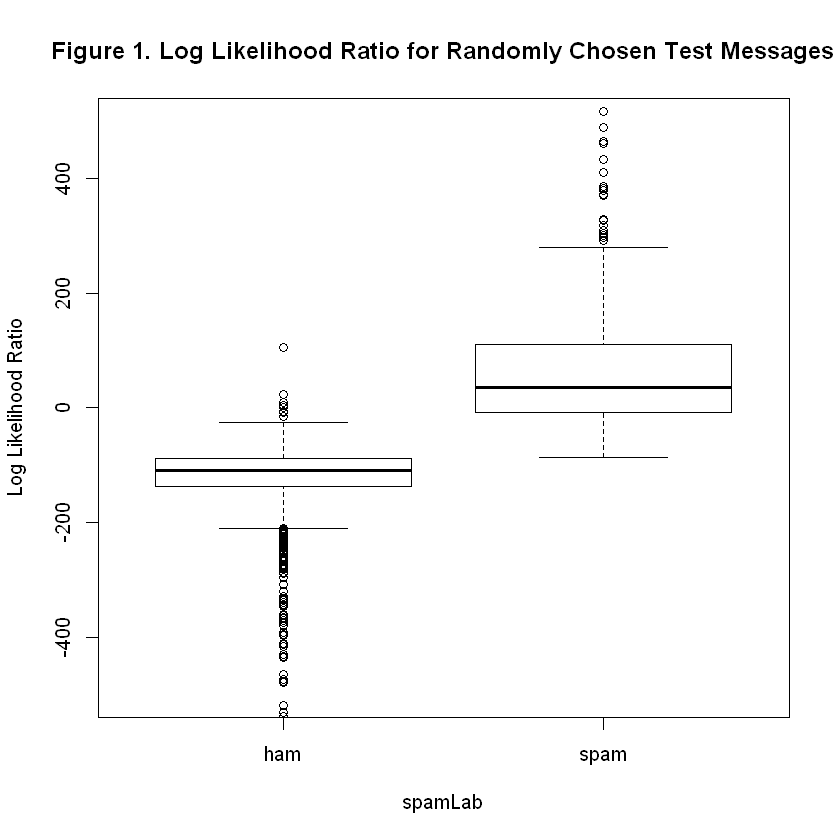

In [23]:
#pdf("SP_Boxplot.pdf", width = 6, height = 6)
spamLab = c("ham", "spam")[1 + testIsSpam]
boxplot(testLLR ~ spamLab, ylab = "Log Likelihood Ratio",
        main = "Figure 1. Log Likelihood Ratio for Randomly Chosen Test Messages",
#         sub ="Figure 1. Log Likelihood Ratio for Randomly Chosen Test Messages.The log likelihood ratio,
# log(P( spam | message content)/P( ham | message content)), for 3116 test messages was
# computed using a naïve Bayes approximation based on word frequencies found in manually
# classified training data. The test messages are grouped according to whether they are spam
# or ham. Notice most ham messages have values well below 0 and nearly all spam values are
# above 0.",
        ylim=c(-500, 500))
#dev.off()
dev.copy(png,'Figure_1_SP_Boxplot.png')
dev.off()

In [24]:


# function for type I error rates
typeIErrorRates = 
function(llrVals, isSpam) 
{
  o = order(llrVals)
  llrVals =  llrVals[o]
  isSpam = isSpam[o]

  idx = which(!isSpam)
  N = length(idx)
  list(error = (N:1)/N, values = llrVals[idx])
}

In [25]:
# function for type II error rate
typeIIErrorRates = function(llrVals, isSpam) {
    
  o = order(llrVals)
  llrVals =  llrVals[o]
  isSpam = isSpam[o]
    
    
  idx = which(isSpam)
  N = length(idx)
  list(error = (1:(N))/N, values = llrVals[idx])
  }  

xI = typeIErrorRates(testLLR, testIsSpam)
xII = typeIIErrorRates(testLLR, testIsSpam)
tau01 = round(min(xI$values[xI$error <= 0.01]))
t2 = max(xII$error[ xII$values < tau01 ])

png 
  3

png 
  2

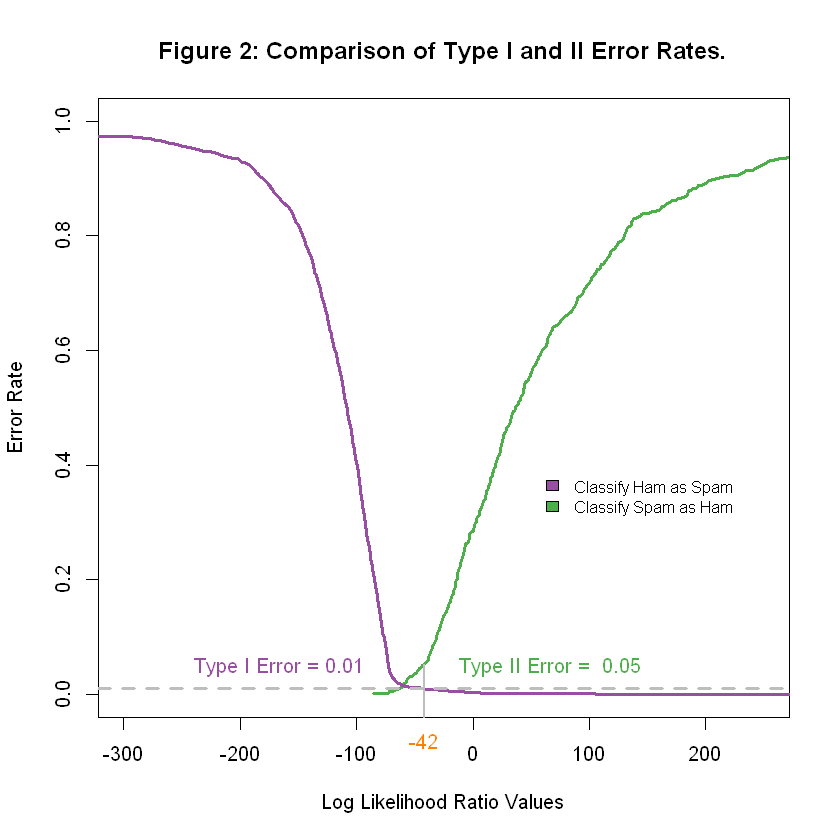

In [26]:
#pdf("LinePlotTypeI+IIErrors.pdf", width = 8, height = 6)

#library(RColorBrewer)
cols = brewer.pal(9, "Set1")[c(3, 4, 5)]
plot(xII$error ~ xII$values,  type = "l", col = cols[1], lwd = 3,
     xlim = c(-300, 250), ylim = c(0, 1),
     xlab = "Log Likelihood Ratio Values",
      main = "Figure 2: Comparison of Type I and II Error Rates.",
     ylab="Error Rate")
points(xI$error ~ xI$values, type = "l", col = cols[2], lwd = 3)
legend(x = 50, y = 0.4, fill = c(cols[2], cols[1]),
       legend = c("Classify Ham as Spam", 
                  "Classify Spam as Ham"), cex = 0.8,
       bty = "n")
abline(h=0.01, col ="grey", lwd = 3, lty = 2)
text(-250, 0.05, pos = 4, "Type I Error = 0.01", col = cols[2])

mtext(tau01, side = 1, line = 0.5, at = tau01, col = cols[3])
segments(x0 = tau01, y0 = -.50, x1 = tau01, y1 = t2, 
         lwd = 2, col = "grey")
text(tau01 + 20, 0.05, pos = 4,
     paste("Type II Error = ", round(t2, digits = 2)), 
     col = cols[1])

dev.copy(png,'Figure_2_LinePlotTypeI+IIErrors.png')
dev.off()

In [27]:
# five folds

k= 5
numTrain = length(trainMsgWords)
partK = sample(numTrain)
tot = k * floor(numTrain/k)
partK = matrix(partK[1:tot], ncol = k)

testFoldOdds = NULL
for (i in 1:k) {
  foldIdx = partK[ , i]
  trainTabFold = computeFreqs(trainMsgWords[-foldIdx], trainIsSpam[-foldIdx])
  testFoldOdds = c(testFoldOdds, 
               sapply(trainMsgWords[ foldIdx ], computeMsgLLR, trainTabFold))
}

testFoldSpam = NULL
for (i in 1:k) {
  foldIdx = partK[ , i]
  testFoldSpam = c(testFoldSpam, trainIsSpam[foldIdx])
}

xFoldI = typeIErrorRates(testFoldOdds, testFoldSpam)
xFoldII = typeIIErrorRates(testFoldOdds, testFoldSpam)
tauFoldI = round(min(xFoldI$values[xFoldI$error <= 0.01]))
tFold2 = xFoldII$error[ xFoldII$values < tauFoldI ]

smallNums = rep((1/2)^40, 2000000)

In [28]:
# function to process header
processHeader = function(header)
{
       # modify the first line to create a key:value pair
  header[1] = sub("^From", "Top-From:", header[1])
  
  headerMat = read.dcf(textConnection(header), all = TRUE)
  headerVec = unlist(headerMat)
  
  dupKeys = sapply(headerMat, function(x) length(unlist(x)))
  names(headerVec) = rep(colnames(headerMat), dupKeys)
  
  return(headerVec)
}


In [29]:
# function to process attachment of the email

processAttach = function(body, contentType){

  n = length(body)
  boundary = getBoundary(contentType)
 
  bString = paste("--", boundary, sep = "")
  bStringLocs = which(bString == body)
  eString = paste("--", boundary, "--", sep = "")
  eStringLoc = which(eString == body)
  
  if (length(eStringLoc) == 0) eStringLoc = n
  if (length(bStringLocs) <= 1) {
    attachLocs = NULL
    msgLastLine = n
    if (length(bStringLocs) == 0) bStringLocs = 0
  } else {
    attachLocs = c(bStringLocs[ -1 ],  eStringLoc)
    msgLastLine = bStringLocs[2] - 1
  }
  
  msg = body[ (bStringLocs[1] + 1) : msgLastLine] 
  if ( eStringLoc < n )
    msg = c(msg, body[ (eStringLoc + 1) : n ])
  
  if ( !is.null(attachLocs) ) {
    attachLens = diff(attachLocs, lag = 1) 
    attachTypes = mapply(function(begL, endL) {
      CTloc = grep("^[Cc]ontent-[Tt]ype", body[ (begL + 1) : (endL - 1)])
      if ( length(CTloc) == 0 ) {
        MIMEType = NA
      } else {
        CTval = body[ begL + CTloc[1] ]
        CTval = gsub('"', "", CTval )
        MIMEType = sub(" *[Cc]ontent-[Tt]ype: *([^;]*);?.*", "\\1", CTval)   
      }
      return(MIMEType)
    }, attachLocs[-length(attachLocs)], attachLocs[-1])
  }
  
  if (is.null(attachLocs)) return(list(body = msg, attachDF = NULL) )
  return(list(body = msg, 
             attachDF = data.frame(aLen = attachLens, 
                                     aType = unlist(attachTypes),
                                     stringsAsFactors = FALSE)))                                
}                       

readEmail = function(dirName) {
       # retrieve the names of files in directory
  fileNames = list.files(dirName, full.names = TRUE)
       # drop files that are not email
  notEmail = grep("cmds$", fileNames)
  if ( length(notEmail) > 0) fileNames = fileNames[ - notEmail ]

       # read all files in the directory
  lapply(fileNames, readLines, encoding = "latin1")
}



In [30]:
# function to process all of the emails
processAllEmail = function(dirName, isSpam = FALSE)
{
       # read all files in the directory
  messages = readEmail(dirName)
  fileNames = names(messages)
  n = length(messages)
  
       # split header from body
  eSplit = lapply(messages, splitMessage)
  rm(messages)

       # process header as named character vector
  headerList = lapply(eSplit, function(msg) 
                                 processHeader(msg$header))
  
       # extract content-type key
  contentTypes = sapply(headerList, function(header) 
                                       header["Content-Type"])
  
       # extract the body
  bodyList = lapply(eSplit, function(msg) msg$body)
  rm(eSplit)

       # which email have attachments
  hasAttach = grep("^ *multi", tolower(contentTypes))

       # get summary stats for attachments and the shorter body
  attList = mapply(processAttach, bodyList[hasAttach], 
                   contentTypes[hasAttach], SIMPLIFY = FALSE)
  
  bodyList[hasAttach] = lapply(attList, function(attEl) 
                                           attEl$body)
 
  attachInfo = vector("list", length = n )
  attachInfo[ hasAttach ] = lapply(attList, 
                                  function(attEl) attEl$attachDF)
 
       # prepare return structure
  emailList = mapply(function(header, body, attach, isSpam) {
                       list(isSpam = isSpam, header = header, 
                            body = body, attach = attach)
                     },
                     headerList, bodyList, attachInfo, 
                     rep(isSpam, n), SIMPLIFY = FALSE )
  names(emailList) = fileNames
  
  invisible(emailList)
}

In [31]:
indx = c(1:5, 15, 27, 68, 69, 329, 404, 427, 516, 852, 971)
emailStruct = mapply(processAllEmail, fullDirNames,
                     isSpam = rep( c(FALSE, TRUE), 3:2))      
emailStruct = unlist(emailStruct, recursive = FALSE)

sampleStruct = emailStruct[ indx ]

save(emailStruct, file="emailXX.rda")

header = sampleStruct[[1]]$header
subject = header["Subject"]
els = strsplit(subject, "")
all(els %in% LETTERS)

testSubject = c("DEAR MADAME", "WINNER!", "")

els = strsplit(testSubject, "")
sapply(els, function(subject) all(subject %in% LETTERS))


gsub("[[:punct:] ]", "", testSubject)

gsub("[^[:alpha:]]", "", testSubject)


[1] FALSE

[1] FALSE FALSE  TRUE

[1] "DEARMADAME" "WINNER"     ""

[1] "DEARMADAME" "WINNER"     ""

In [32]:
# isYelling = function(msg) {
#   if ( "Subject" %in% names(msg$header) ) {
#      el = gsub("[^[:alpha:]]", "", msg$header["Subject"])
#      if (nchar(el) > 0) 
#         nchar(gsub("[A-Z]", "", el)) < 1
#      else 
#         FALSE
#   } else 
#     NA
# }

# perCaps =
# function(msg)
# {
#   body = paste(msg$body, collapse = "")

#        # Return NA if the body of the message is "empty"
#   if(length(body) == 0 || nchar(body) == 0) return(NA)

#        # Eliminate non-alpha characters
#   body = gsub("[^[:alpha:]]", "", body)
#   capText = gsub("[^A-Z]", "", body)
#   100 * nchar(capText)/nchar(body)
# }


In [33]:
# #sapply(sampleStruct, perCaps)
# # function list
# funcList = list( 
#  isRe = function(msg) {
#        "Subject" %in% names(msg$header) &&
#          length(grep("^[ \t]*Re:", msg$header[["Subject"]])) > 0
#   },
#   numLines = function(msg) 
#                 length(msg$body),
#   isYelling = function(msg) {
#     if ( "Subject" %in% names(msg$header) ) {
#        el = gsub("[^[:alpha:]]", "", msg$header["Subject"])
#        if (nchar(el) > 0) 
#          nchar(gsub("[A-Z]", "", el)) < 1
#        else 
#          FALSE
#     }
#     else NA
#   },
#   perCaps = function(msg) {
#     body = paste(msg$body, collapse = "")

#          # Return NA if the body of the message is "empty"
#     if(length(body) == 0 || nchar(body) == 0) return(NA)

#          # Eliminate non-alpha characters
#     body = gsub("[^[:alpha:]]", "", body)
#     capText = gsub("[^A-Z]", "", body)
#     100 * nchar(capText)/nchar(body)
#   }
# )

In [34]:
# lapply(funcList, function(func) 
#                    sapply(sampleStruct, function(msg) func(msg)))

createDerivedDF =
function(email = emailStruct, operations = funcList, 
         verbose = FALSE)
{
  els = lapply(names(operations),
               function(id) {
                 if(verbose) print(id)
                 e = operations[[id]]
                 v = if(is.function(e)) 
                        sapply(email, e)
                      else 
                        sapply(email, function(msg) eval(e))
                 v
         })

   df = as.data.frame(els)
   names(df) = names(operations)
   invisible(df)
}

# sampleDF = createDerivedDF(sampleStruct)
# head(sampleDF)

In [35]:
funcList = list(
  isSpam =
    expression(msg$isSpam)
  ,
  isRe =
    function(msg) {
      # Can have a Fwd: Re:  ... but we are not looking for this here.
      # We may want to look at In-Reply-To field.
      "Subject" %in% names(msg$header) && 
        length(grep("^[ \t]*Re:", msg$header[["Subject"]])) > 0
    }
  ,
  numLines =
    function(msg) length(msg$body)
  ,
  bodyCharCt =
    function(msg)
      sum(nchar(msg$body))
  ,
  underscore =
    function(msg) {
      if(!"Reply-To" %in% names(msg$header))
        return(FALSE)
      
      txt <- msg$header[["Reply-To"]]
      length(grep("_", txt)) > 0  && 
        length(grep("[0-9A-Za-z]+", txt)) > 0
    }
  ,
  subExcCt = 
    function(msg) {
      x = msg$header["Subject"]
      if(length(x) == 0 || sum(nchar(x)) == 0 || is.na(x))
        return(NA)
      
      sum(nchar(gsub("[^!]","", x)))
    }
  ,
  subQuesCt =
    function(msg) {
      x = msg$header["Subject"]
      if(length(x) == 0 || sum(nchar(x)) == 0 || is.na(x))
        return(NA)
      
      sum(nchar(gsub("[^?]","", x)))
    }
  ,
  numAtt = 
    function(msg) {
      if (is.null(msg$attach)) return(0)
      else nrow(msg$attach)
    }
   
  ,
  priority =
    function(msg) {
      ans <- FALSE
      # Look for names X-Priority, Priority, X-Msmail-Priority
      # Look for high any where in the value
      ind = grep("priority", tolower(names(msg$header)))
      if (length(ind) > 0)  {
        ans <- length(grep("high", tolower(msg$header[ind]))) >0
      }
      ans
    }
  ,
  numRec =
    function(msg) {
      # unique or not.
      els = getMessageRecipients(msg$header)
      
      if(length(els) == 0)
        return(NA)
      
      # Split each line by ","  and in each of these elements, look for
      # the @ sign. This handles
      tmp = sapply(strsplit(els, ","), function(x) grep("@", x))
      sum(sapply(tmp, length))
    }
  ,
  perCaps =
    function(msg)
    {
      body = paste(msg$body, collapse = "")
      
      # Return NA if the body of the message is "empty"
      if(length(body) == 0 || nchar(body) == 0) return(NA)
      
      # Eliminate non-alpha characters and empty lines 
      body = gsub("[^[:alpha:]]", "", body)
      els = unlist(strsplit(body, ""))
      ctCap = sum(els %in% LETTERS)
      100 * ctCap / length(els)
    }
  ,
  isInReplyTo =
    function(msg)
    {
      "In-Reply-To" %in% names(msg$header)
    }
  ,
  sortedRec =
    function(msg)
    {
      ids = getMessageRecipients(msg$header)
      all(sort(ids) == ids)
    }
  ,
  subPunc =
    function(msg)
    {
      if("Subject" %in% names(msg$header)) {
        el = gsub("['/.:@-]", "", msg$header["Subject"])
        length(grep("[A-Za-z][[:punct:]]+[A-Za-z]", el)) > 0
      }
      else
        FALSE
    },
  hour =
    function(msg)
    {
      date = msg$header["Date"]
      if ( is.null(date) ) return(NA)
      # Need to handle that there may be only one digit in the hour
      locate = regexpr("[0-2]?[0-9]:[0-5][0-9]:[0-5][0-9]", date)
      
      if (locate < 0)
        locate = regexpr("[0-2]?[0-9]:[0-5][0-9]", date)
      if (locate < 0) return(NA)
      
      hour = substring(date, locate, locate+1)
      hour = as.numeric(gsub(":", "", hour))
      
      locate = regexpr("PM", date)
      if (locate > 0) hour = hour + 12
      
      locate = regexpr("[+-][0-2][0-9]00", date)
      if (locate < 0) offset = 0
      else offset = as.numeric(substring(date, locate, locate + 2))
      (hour - offset) %% 24
    }
  ,
  multipartText =
    function(msg)
    {
      if (is.null(msg$attach)) return(FALSE)
      numAtt = nrow(msg$attach)
      
      types = 
        length(grep("(html|plain|text)", msg$attach$aType)) > (numAtt/2)
    }
  ,
  hasImages =
    function(msg)
    {
      if (is.null(msg$attach)) return(FALSE)
      
      length(grep("^ *image", tolower(msg$attach$aType))) > 0
    }
  ,
  isPGPsigned =
    function(msg)
    {
      if (is.null(msg$attach)) return(FALSE)
      
      length(grep("pgp", tolower(msg$attach$aType))) > 0
    },
  perHTML =
    function(msg)
    {
      if(! ("Content-Type" %in% names(msg$header))) return(0)
      
      el = tolower(msg$header["Content-Type"]) 
      if (length(grep("html", el)) == 0) return(0)
      
      els = gsub("[[:space:]]", "", msg$body)
      totchar = sum(nchar(els))
      totplain = sum(nchar(gsub("<[^<]+>", "", els )))
      100 * (totchar - totplain)/totchar
    },
  subSpamWords =
    function(msg)
    {
      if("Subject" %in% names(msg$header))
        length(grep(paste(SpamCheckWords, collapse = "|"), 
                    tolower(msg$header["Subject"]))) > 0
      else
        NA
    }
  ,
  subBlanks =
    function(msg)
    {
      if("Subject" %in% names(msg$header)) {
        x = msg$header["Subject"]
        # should we count blank subject line as 0 or 1 or NA?
        if (nchar(x) == 1) return(0)
        else 100 *(1 - (nchar(gsub("[[:blank:]]", "", x))/nchar(x)))
      } else NA
    }
  ,
  noHost =
    function(msg)
    {
      # Or use partial matching.
      idx = pmatch("Message-", names(msg$header))
      
      if(is.na(idx)) return(NA)
      
      tmp = msg$header[idx]
      return(length(grep(".*@[^[:space:]]+", tmp)) ==  0)
    }
  ,
  numEnd =
    function(msg)
    {
      # If we just do a grep("[0-9]@",  )
      # we get matches on messages that have a From something like
      # " \"marty66@aol.com\" <synjan@ecis.com>"
      # and the marty66 is the "user's name" not the login
      # So we can be more precise if we want.
      x = names(msg$header)
      if ( !( "From" %in% x) ) return(NA)
      login = gsub("^.*<", "", msg$header["From"])
      if ( is.null(login) ) 
        login = gsub("^.*<", "", msg$header["X-From"])
      if ( is.null(login) ) return(NA)
      login = strsplit(login, "@")[[1]][1]
      length(grep("[0-9]+$", login)) > 0
    },
  isYelling =
    function(msg)
    {
      if ( "Subject" %in% names(msg$header) ) {
        el = gsub("[^[:alpha:]]", "", msg$header["Subject"])
        if (nchar(el) > 0) nchar(gsub("[A-Z]", "", el)) < 1
        else FALSE
      }
      else
        NA
    },
  forwards =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0 || sum(nchar(x)) == 0)
        return(NA)
      
      ans = length(grep("^[[:space:]]*>", x))
      100 * ans / length(x)
    },
  isOrigMsg =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0) return(NA)
      
      length(grep("^[^[:alpha:]]*original[^[:alpha:]]+message[^[:alpha:]]*$", 
                  tolower(x) ) ) > 0
    },
  isDear =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0) return(NA)
      
      length(grep("^[[:blank:]]*dear +(sir|madam)\\>", 
                  tolower(x))) > 0
    },
  isWrote =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0) return(NA)
      
      length(grep("(wrote|schrieb|ecrit|escribe):", tolower(x) )) > 0
    },
  avgWordLen =
    function(msg)
    {
      txt = paste(msg$body, collapse = " ")
      if(length(txt) == 0 || sum(nchar(txt)) == 0) return(0)
      
      txt = gsub("[^[:alpha:]]", " ", txt)
      words = unlist(strsplit(txt, "[[:blank:]]+"))
      wordLens = nchar(words)
      mean(wordLens[ wordLens > 0 ])
    }
  ,
  numDlr =
    function(msg)
    {
      x = paste(msg$body, collapse = "")
      if(length(x) == 0 || sum(nchar(x)) == 0)
        return(NA)
      
      nchar(gsub("[^$]","", x))
    }
)



In [36]:
SpamCheckWords =
  c("viagra", "pounds", "free", "weight", "guarantee", "million", 
    "dollars", "credit", "risk", "prescription", "generic", "drug",
    "financial", "save", "dollar", "erotic", "million", "barrister",
    "beneficiary", "easy", 
    "money back", "money", "credit card")


getMessageRecipients =
  function(header)
  {
    c(if("To" %in% names(header))  header[["To"]] else character(0),
      if("Cc" %in% names(header))  header[["Cc"]] else character(0),
      if("Bcc" %in% names(header)) header[["Bcc"]] else character(0)
    )
  }

emailDF = createDerivedDF(emailStruct)
dim(emailDF)
#save(emailDF, file = "spamAssassinDerivedDF.rda")

[1] 9348   30

In [37]:
#load("Data/spamAssassinDerivedDF.rda")
#dim(emailDF)

perCaps2 =
function(msg)
{
  body = paste(msg$body, collapse = "")

       # Return NA if the body of the message is "empty"
  if(length(body) == 0 || nchar(body) == 0) return(NA)

       # Eliminate non-alpha characters and empty lines 
  body = gsub("[^[:alpha:]]", "", body)
  els = unlist(strsplit(body, ""))
  ctCap = sum(els %in% LETTERS)
  100 * ctCap / length(els)
}


In [38]:
# pC = sapply(emailStruct, perCaps)
# pC2 = sapply(emailStruct, perCaps2)
# identical(pC, pC2)

# indNA = which(is.na(emailDF$subExcCt))

# indNoSubject = which(sapply(emailStruct, 
#                             function(msg) 
#                               !("Subject" %in% names(msg$header))))

# all(indNA == indNoSubject)

# all(emailDF$bodyCharCt > emailDF$numLines)


# x.at = c(1,10,100,1000,10000,100000)
# y.at = c(1, 5, 10, 50, 100, 500, 5000)
# nL = 1 + emailDF$numLines
# nC = 1 + emailDF$bodyCharCt

null device 
          1

png 
  3

png 
  2

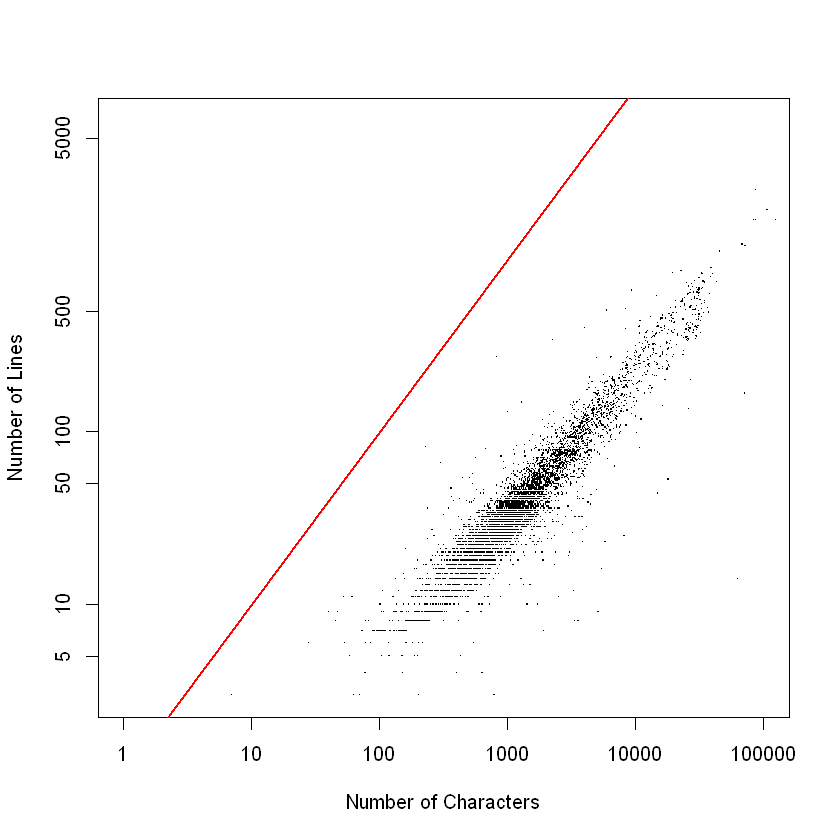

In [39]:
x.at = c(1,10,100,1000,10000,100000)
y.at = c(1, 5, 10, 50, 100, 500, 5000)
nL = 1 + emailDF$numLines
nC = 1 + emailDF$bodyCharCt


#pdf("ScatterPlotNumLinesNumChars.pdf", width = 6, height = 4.5)
plot(nL ~ nC, log = "xy", pch=".", xlim=c(1,100000), axes = FALSE,
     xlab = "Number of Characters", ylab = "Number of Lines")
box() 
axis(1, at = x.at, labels = formatC(x.at, digits = 0, format="d"))
axis(2, at = y.at, labels = formatC(y.at, digits = 0, format="d")) 
abline(a=0, b=1, col="red", lwd = 2)
dev.off()

#pdf("SPAM_boxplotsPercentCaps.pdf", width = 5, height = 5)

percent = emailDF$perCaps
isSpamLabs = factor(emailDF$isSpam, labels = c("ham", "spam"))
boxplot(log(1 + percent) ~ isSpamLabs,
        main = "Figure 3. Comparison of Two Measures of Length for a Message.",
        ylab = "Percent Capitals (log)")

dev.copy(png,'Figure_3_SPAM_boxplotsPercentCaps.png')
dev.off()

png 
  3

png 
  2

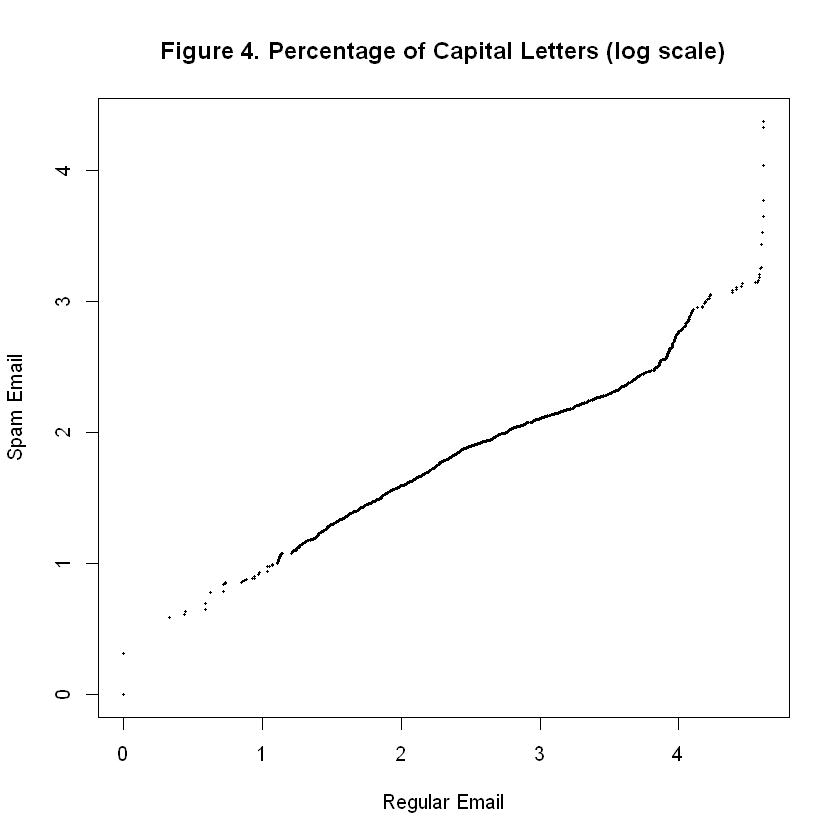

In [40]:
logPerCapsSpam = log(1 + emailDF$perCaps[ emailDF$isSpam ])
logPerCapsHam = log(1 + emailDF$perCaps[ !emailDF$isSpam ])

qqplot(logPerCapsSpam, logPerCapsHam, 
       xlab = "Regular Email", ylab = "Spam Email", 
       main = "Figure 4. Percentage of Capital Letters (log scale)",
       pch = 19, cex = 0.3)     
dev.copy(png,'Figure_4_SPAM_Percentage of Capital Letters.png')
dev.off()

png 
  3

png 
  2

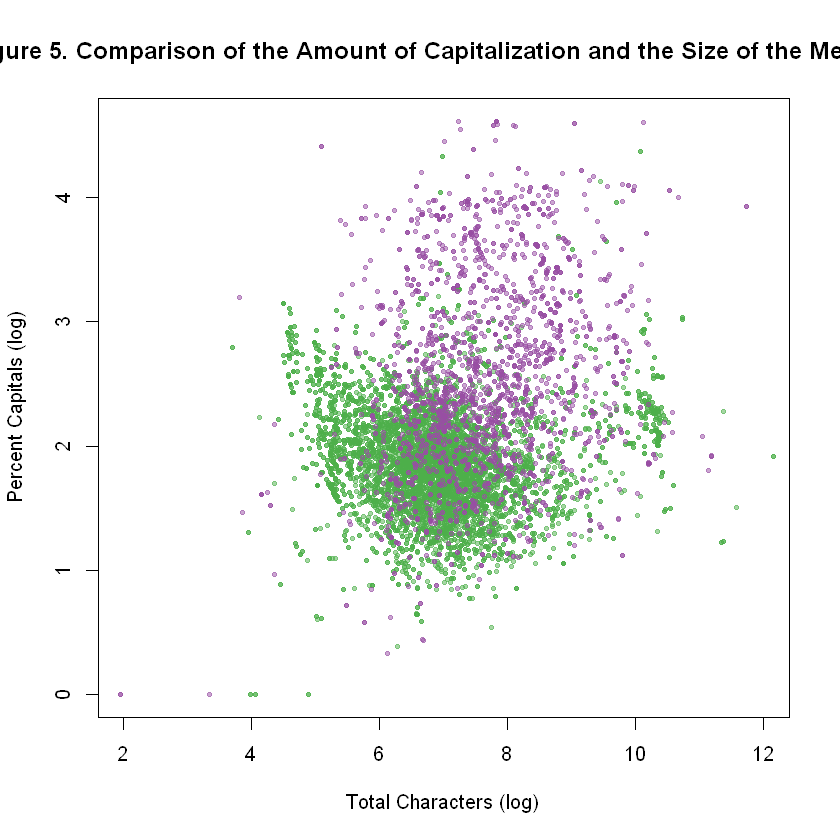

In [41]:
#pdf("SPAM_scatterplotPercentCapsTotChars.pdf", width = 8, height = 6)
 
colI = c("#4DAF4A80", "#984EA380")
logBodyCharCt = log(1 + emailDF$bodyCharCt)
logPerCaps = log(1 + emailDF$perCaps)
plot(logPerCaps ~ logBodyCharCt, xlab = "Total Characters (log)",
     ylab = "Percent Capitals (log)",
     col = colI[1 + emailDF$isSpam],
     main = "Figure 5. Comparison of the Amount of Capitalization and the Size of the Message.",
     xlim = c(2,12), pch = 19, cex = 0.5)

dev.copy(png,'Figure_5_SPAM_scatterplotPercentCapsTotChars.png')
dev.off()

    isSpamLabs
      ham spam
  0  6624 2158
  1   314  230
  2    11    6
  4     0    1
  5     1    2
  18    1    0

png 
  3

png 
  2

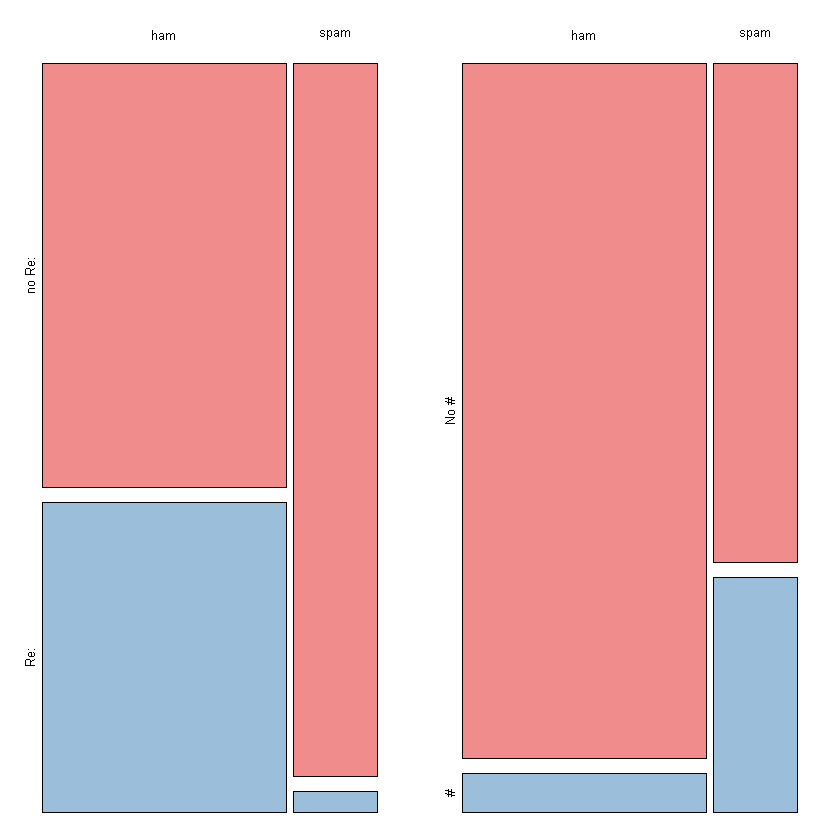

In [42]:
table(emailDF$numAtt, isSpamLabs)
#pdf("SPAM_mosaicPlots.pdf", width = 8, height = 4)

oldPar = par(mfrow = c(1, 2), mar = c(1,1,1,1))

colM = c("#E41A1C80", "#377EB880")
isRe = factor(emailDF$isRe, labels = c("no Re:", "Re:"))
mosaicplot(table(isSpamLabs, isRe), main = "",
           xlab = "", ylab = "", color = colM)

fromNE = factor(emailDF$numEnd, labels = c("No #", "#"))
mosaicplot(table(isSpamLabs, fromNE), color = colM,
           main = "", xlab="", ylab = "")
oldpar.title = 'Figure 6. Exploring Categorical Measures Derived from email.'
par(oldPar)


dev.copy(png,'Figure_6_SPAM_mosaicPlots.png')
dev.off()

In [43]:

setupRpart = function(data) {
  logicalVars = which(sapply(data, is.logical))
  facVars = lapply(data[ , logicalVars], 
                   function(x) {
                      x = as.factor(x)
                      levels(x) = c("F", "T")
                      x
                   })
  cbind(facVars, data[ , - logicalVars])
}

emailDFrp = setupRpart(emailDF)

In [44]:


set.seed(418910)
testSpamIdx = sample(numSpam, size = floor(numSpam/3))
testHamIdx = sample(numHam, size = floor(numHam/3))

testDF = 
  rbind( emailDFrp[ emailDFrp$isSpam == "T", ][testSpamIdx, ],
         emailDFrp[emailDFrp$isSpam == "F", ][testHamIdx, ] )
trainDF =
  rbind( emailDFrp[emailDFrp$isSpam == "T", ][-testSpamIdx, ], 
         emailDFrp[emailDFrp$isSpam == "F", ][-testHamIdx, ])

minsplit = 20
rpartFit1 = rpart(isSpam ~ ., data = trainDF, method = "class")
rpartFit1.5 = rpart(isSpam ~ ., data = trainDF, method = "class",minsplit = 2,   minbucket = 1) 
rpartFit2 = rpart(isSpam ~ ., data = trainDF, method = "class", parms = list(prior = c(.65,.35), split = "information"))
rpartFit3 = rpart(isSpam ~ ., data = trainDF, method = "class",control = rpart.control(cp = 0.01,xval = 10))
rpartFit4 = rpart(isSpam ~ ., data = trainDF, method = "class",control = rpart.control(cp = 0.01, minbucket = round(minsplit/3)))

In [45]:
# function to fit the given model
rpartFitFunc = function(rpartFit,fileNamePostfix) {
    print(rpartFit)
    prp(rpartFit, extra = 1)

    #library(rpart)
    #pdf("SPAM_rpartTree.pdf", width = 7, height = 7)

    prp(rpartFit, extra = 1)
    
    fileName = paste('SPAM__rpartTree',fileNamePostfix,'.png',sep="")
    dev.copy(png,fileName)
    dev.off()

    predictions = predict(rpartFit, 
           newdata = testDF[, names(testDF) != "isSpam"],
           type = "class")

    predsForHam = predictions[ testDF$isSpam == "F" ]
    summary(predsForHam)

    sum(predsForHam == "T") / length(predsForHam)

    predsForSpam = predictions[ testDF$isSpam == "T" ]
    sum(predsForSpam == "F") / length(predsForSpam)

    complexityVals = c(seq(0.00001, 0.0001, length=19),
                       seq(0.0001, 0.001, length=19), 
                       seq(0.001, 0.005, length=9),
                       seq(0.005, 0.01, length=9))
    
    fits = lapply(complexityVals, function(x) {
         rpartObj = rpart(isSpam ~ ., data = trainDF,
                          method="class", 
                          control = rpart.control(cp=x) )
           
         predict(rpartObj, 
                 newdata = testDF[ , names(testDF) != "isSpam"],
                 type = "class")
        })

    spam = testDF$isSpam == "T"
    numSpam = sum(spam)
    numHam = sum(!spam)
    errs = sapply(fits, function(preds) {
                          typeI = sum(preds[ !spam ] == "T") / numHam
                          typeII = sum(preds[ spam ] == "F") / numSpam
                          c(typeI = typeI, typeII = typeII)
                         })
    
    #pdf("SPAM_rpartTypeIandII.pdf", width = 8, height = 7)
    #library(RColorBrewer)
    cols = brewer.pal(9, "Set1")[c(3, 4, 5)]
    plot(errs[1,] ~ complexityVals, type="l", col=cols[2], 
         lwd = 2, ylim = c(0,0.2), xlim = c(0,0.01), 
         ylab="Error", xlab="complexity parameter values")
    points(errs[2,] ~ complexityVals, type="l", col=cols[1], lwd = 2)

    text(x =c(0.003, 0.0035), y = c(0.12, 0.05), 
         labels=c("Type II Error", "Type I Error"))

    minI = which(errs[1,] == min(errs[1,]))[1]
    abline(v = complexityVals[minI], col ="grey", lty =3, lwd=2)

    text(0.0007, errs[1, minI]+0.01, 
         formatC(errs[1, minI], digits = 2))
    text(0.0007, errs[2, minI]+0.01, 
         formatC(errs[2, minI], digits = 3))

 
    fileName = paste('SPAM_rpartTypeIandII',fileNamePostfix,'.png',sep="")
    dev.copy(png,fileName)
    dev.off()
    return(complexityVals)
    }

n= 6232 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 6232 1598 F (0.743581515 0.256418485)  
    2) perCaps< 12.86122 5342  904 F (0.830774991 0.169225009)  
      4) perHTML< 3.926441 4912  614 F (0.875000000 0.125000000)  
        8) forwards>=0.2055889 2305   15 F (0.993492408 0.006507592) *
        9) forwards< 0.2055889 2607  599 F (0.770233985 0.229766015)  
         18) subExcCt< 0.5 2444  480 F (0.803600655 0.196399345)  
           36) numDlr< 0.5 2053  292 F (0.857769118 0.142230882)  
             72) subBlanks< 24.72727 2013  252 F (0.874813711 0.125186289)  
              144) multipartText=F 1915  197 F (0.897127937 0.102872063)  
                288) isDear=F 1891  173 F (0.908514014 0.091485986) *
                289) isDear=T 24    0 T (0.000000000 1.000000000) *
              145) multipartText=T 98   43 T (0.438775510 0.561224490)  
                290) bodyCharCt< 640.5 28    2 F (0.928571429 0.071428571) *
                291) bod

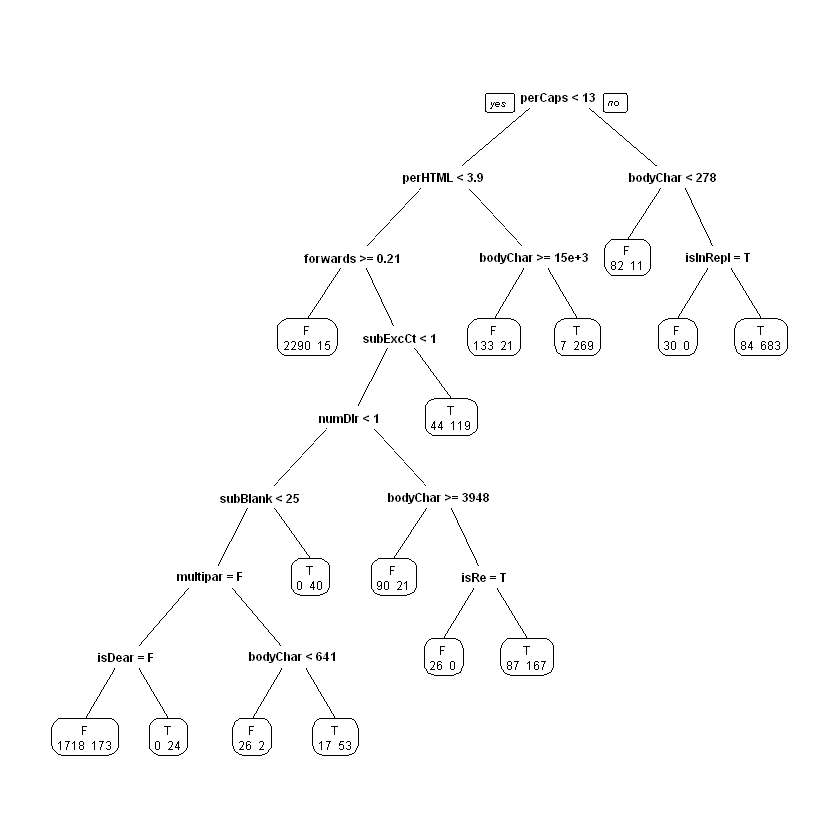

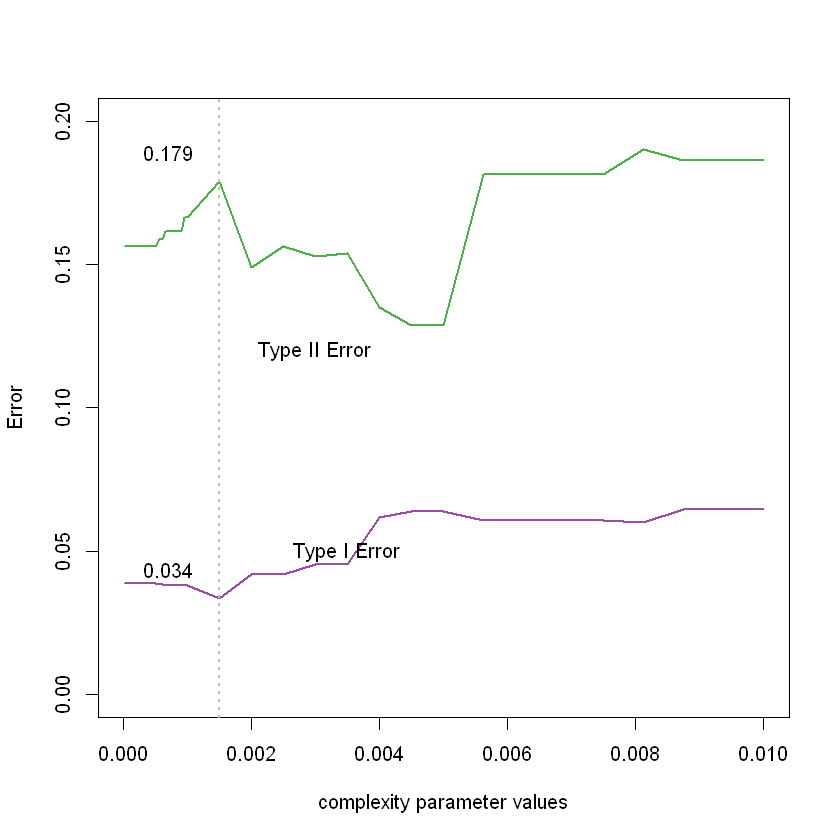

In [46]:
# Regular model
complexityVals1 = rpartFitFunc(rpartFit1,'_1')

n= 6232 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 6232 1598 F (0.743581515 0.256418485)  
    2) perCaps< 12.86122 5342  904 F (0.830774991 0.169225009)  
      4) perHTML< 3.926441 4912  614 F (0.875000000 0.125000000)  
        8) forwards>=0.2055889 2305   15 F (0.993492408 0.006507592) *
        9) forwards< 0.2055889 2607  599 F (0.770233985 0.229766015)  
         18) subExcCt< 0.5 2444  480 F (0.803600655 0.196399345)  
           36) numDlr< 0.5 2053  292 F (0.857769118 0.142230882)  
             72) subBlanks< 24.72727 2013  252 F (0.874813711 0.125186289)  
              144) multipartText=F 1915  197 F (0.897127937 0.102872063)  
                288) isDear=F 1891  173 F (0.908514014 0.091485986) *
                289) isDear=T 24    0 T (0.000000000 1.000000000) *
              145) multipartText=T 98   43 T (0.438775510 0.561224490)  
                290) bodyCharCt< 640.5 28    2 F (0.928571429 0.071428571) *
                291) bod

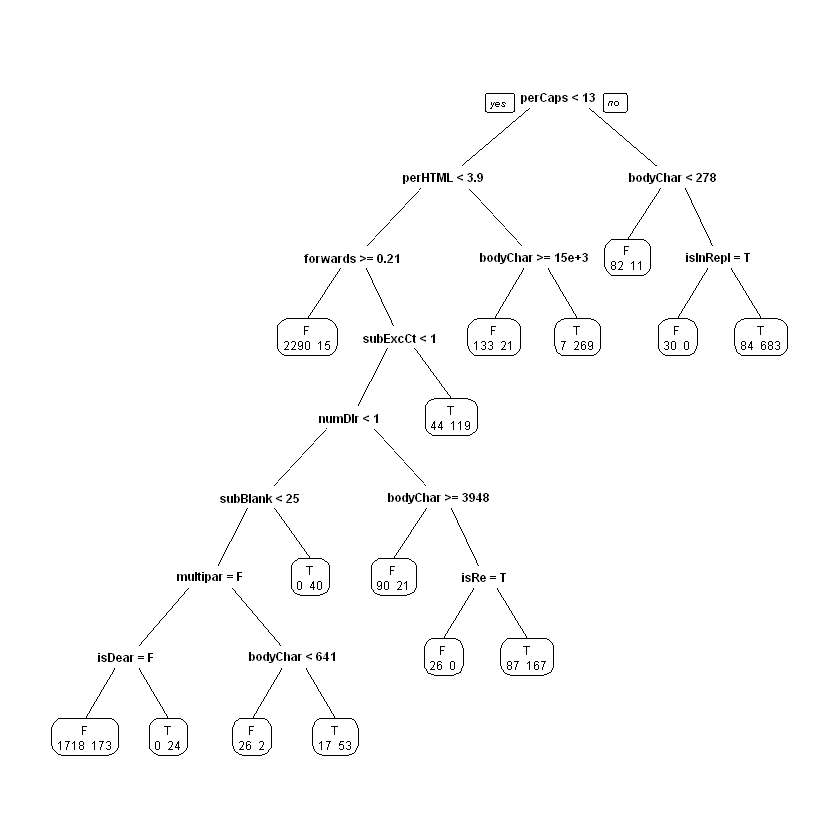

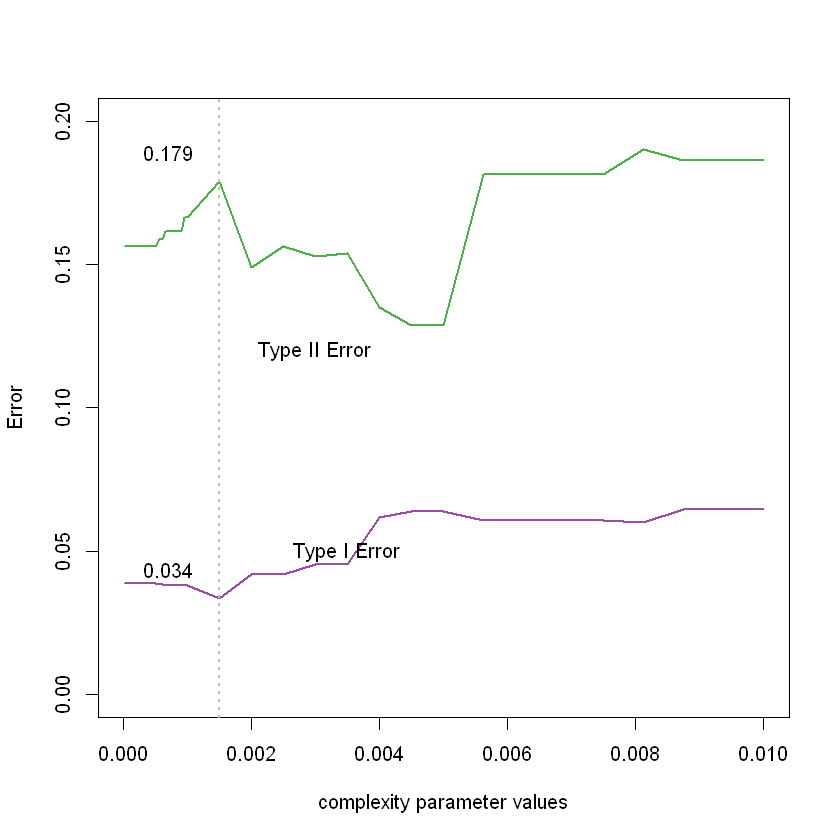

In [47]:
# Regular model
complexityVals1.5 = rpartFitFunc(rpartFit1.5,'_1.5')

n= 6232 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

   1) root 6232 2181.200000 F (0.650000000 0.350000000)  
     2) forwards>=6.100478 2065    8.189737 F (0.995470428 0.004529572) *
     3) forwards< 6.100478 4167 2173.010000 F (0.508806608 0.491193392)  
       6) perCaps< 12.86122 3312 1232.555000 F (0.630792018 0.369207982)  
        12) perHTML< 3.926441 2882  836.718100 F (0.703308172 0.296691828)  
          24) bodyCharCt< 444 727   38.218770 F (0.941133779 0.058866221) *
          25) bodyCharCt>=444 2155  798.499400 F (0.632182373 0.367817627)  
            50) isInReplyTo=T 332    0.000000 F (1.000000000 0.000000000) *
            51) isInReplyTo=F 1823  798.499400 F (0.575423047 0.424576953)  
             102) perCaps< 7.860088 1431  480.464600 F (0.662516852 0.337483148)  
               204) subExcCt< 0.5 1333  378.092900 F (0.709425932 0.290574068)  
                 408) numDlr< 0.5 1073  215.663100 F (0.787630378 0.212369622)  
             

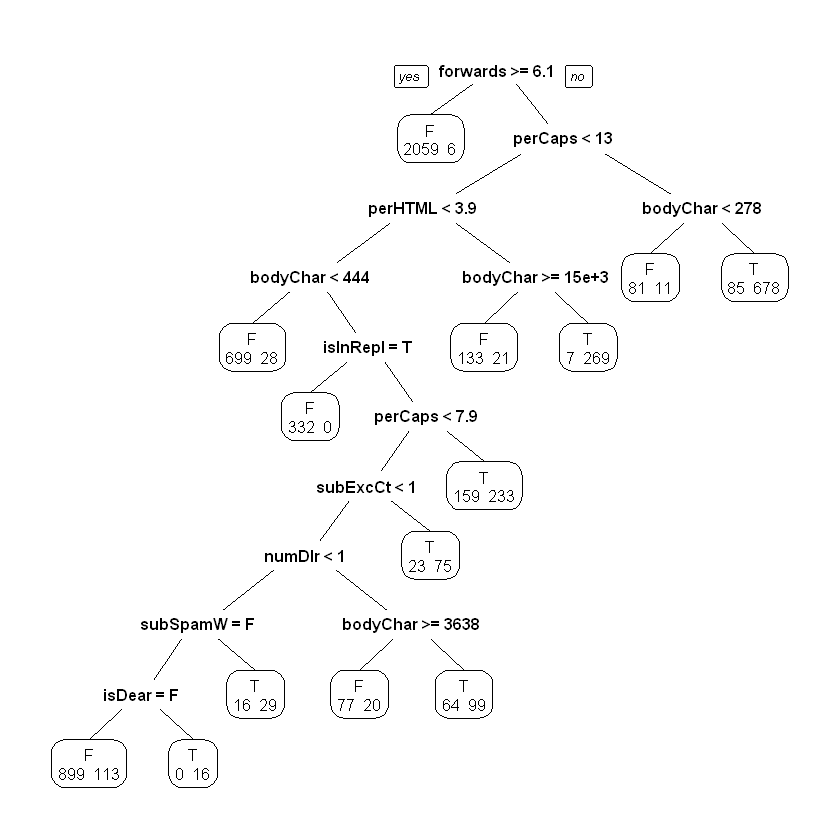

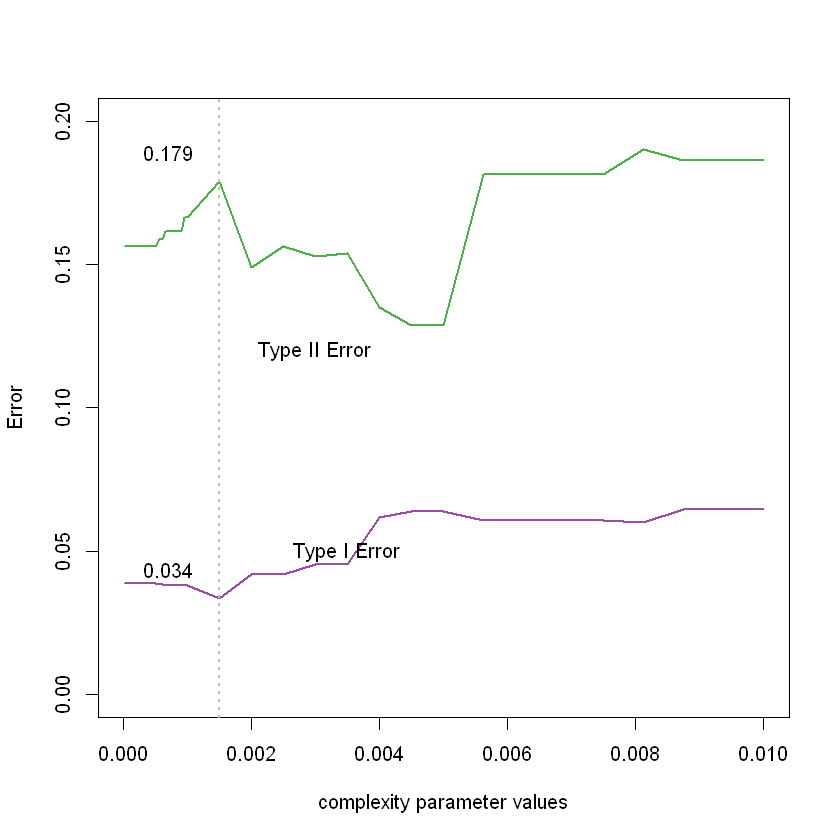

In [48]:
complexityVals2 = rpartFitFunc(rpartFit2,'2')

n= 6232 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 6232 1598 F (0.743581515 0.256418485)  
    2) perCaps< 12.86122 5342  904 F (0.830774991 0.169225009)  
      4) perHTML< 3.926441 4912  614 F (0.875000000 0.125000000)  
        8) forwards>=0.2055889 2305   15 F (0.993492408 0.006507592) *
        9) forwards< 0.2055889 2607  599 F (0.770233985 0.229766015)  
         18) subExcCt< 0.5 2444  480 F (0.803600655 0.196399345)  
           36) numDlr< 0.5 2053  292 F (0.857769118 0.142230882)  
             72) subBlanks< 24.72727 2013  252 F (0.874813711 0.125186289)  
              144) multipartText=F 1915  197 F (0.897127937 0.102872063)  
                288) isDear=F 1891  173 F (0.908514014 0.091485986) *
                289) isDear=T 24    0 T (0.000000000 1.000000000) *
              145) multipartText=T 98   43 T (0.438775510 0.561224490)  
                290) bodyCharCt< 640.5 28    2 F (0.928571429 0.071428571) *
                291) bod

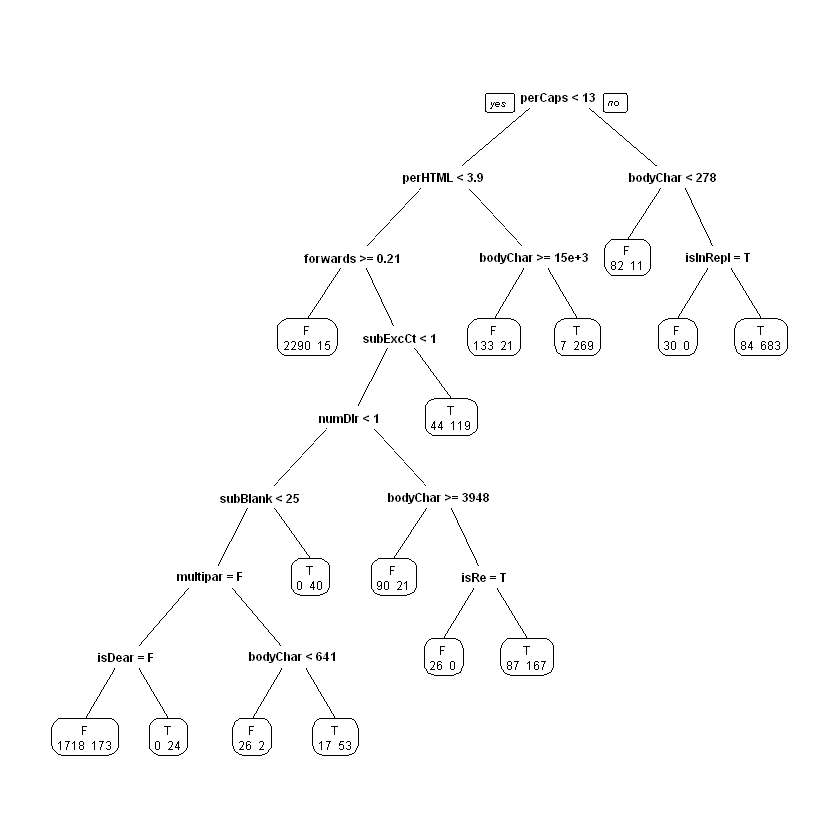

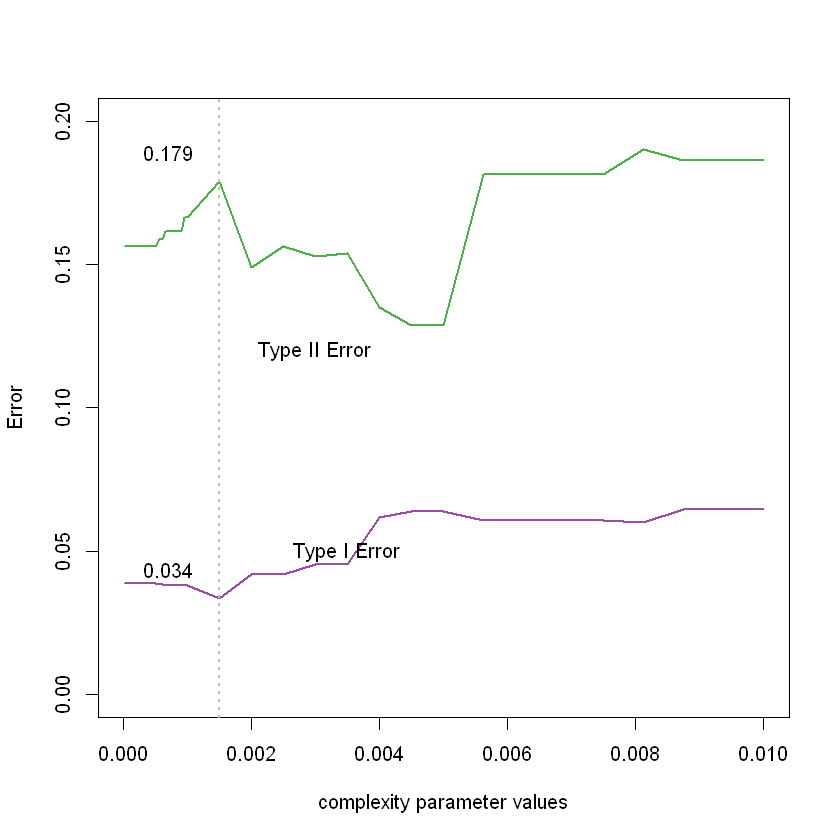

In [49]:
complexityVals3 = rpartFitFunc(rpartFit3,'_3')

n= 6232 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 6232 1598 F (0.743581515 0.256418485)  
    2) perCaps< 12.86122 5342  904 F (0.830774991 0.169225009)  
      4) perHTML< 3.926441 4912  614 F (0.875000000 0.125000000)  
        8) forwards>=0.2055889 2305   15 F (0.993492408 0.006507592) *
        9) forwards< 0.2055889 2607  599 F (0.770233985 0.229766015)  
         18) subExcCt< 0.5 2444  480 F (0.803600655 0.196399345)  
           36) numDlr< 0.5 2053  292 F (0.857769118 0.142230882)  
             72) subBlanks< 24.72727 2013  252 F (0.874813711 0.125186289)  
              144) multipartText=F 1915  197 F (0.897127937 0.102872063)  
                288) isDear=F 1891  173 F (0.908514014 0.091485986) *
                289) isDear=T 24    0 T (0.000000000 1.000000000) *
              145) multipartText=T 98   43 T (0.438775510 0.561224490)  
                290) bodyCharCt< 640.5 28    2 F (0.928571429 0.071428571) *
                291) bod

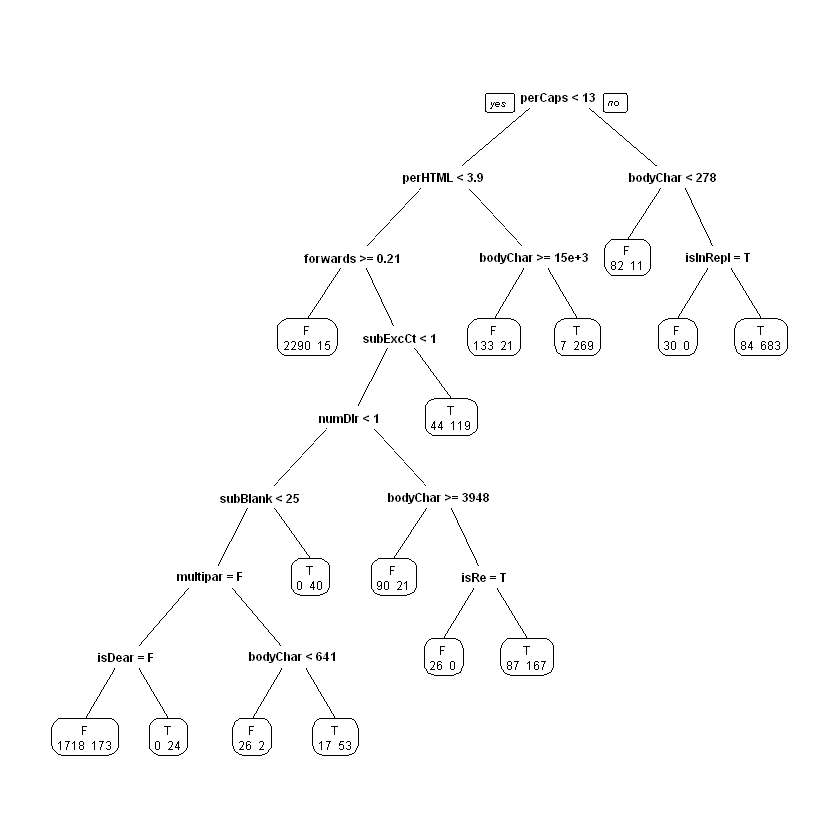

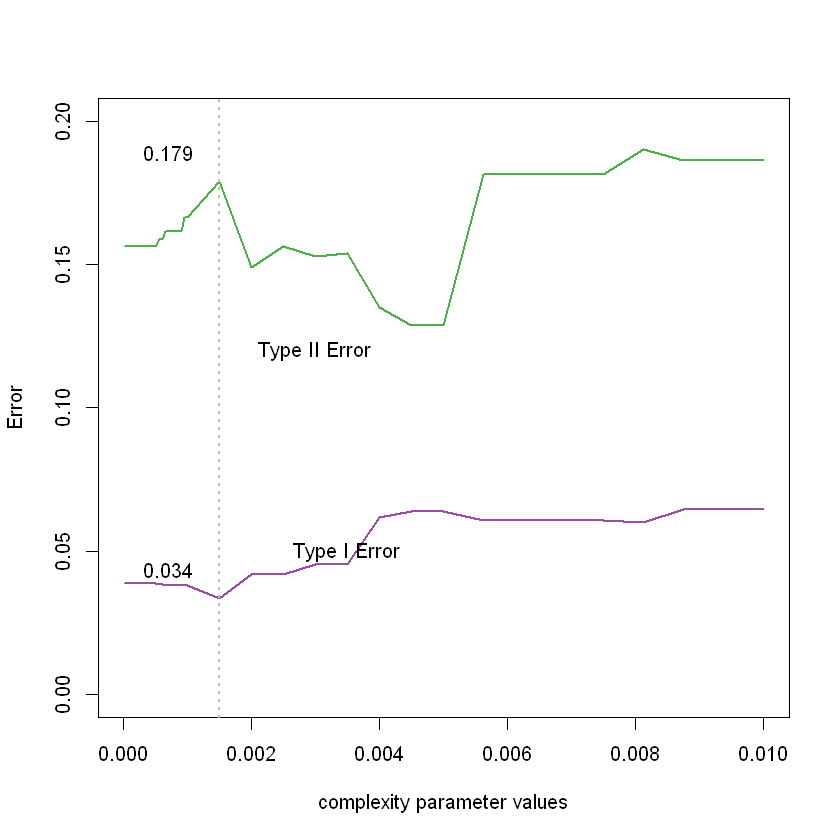

In [50]:
complexityVals4 = rpartFitFunc(rpartFit4,'_4')

In [51]:
save(emailDFrp,file="data.Rda")

## Data Cleaning and Factoize Logical Variables'.  
We need to change it to numbers.  And as it turns out, there are quite a few NANs as well.  Let's set those to zero because imputation was 9 weeks ago

In [52]:
# 
setupRnum = function(data) {
  logicalVars = which(sapply(data, is.logical))
  facVars = lapply(data[ , logicalVars], 
                   function(x) {
                      x = as.numeric(x)
                   })
  cbind(facVars, data[ , - logicalVars])
}

emailDFnum = setupRnum(emailDF)

emailDFnum[is.na(emailDFnum)]<-0

## Finally Metric Stuff
Because our authors prefer Type I/II errors, but the cool kids know that precision/recall/F1 is where its at, while the default of caret is accuracy and kappa.  To get us all on the same page, I create a function that returns the metrics we want.  However, rather than re-invent the wheel, I just install a package.  I am not sure if it had Type I/II errors so those I made my self.  \#MLSwag

In [53]:
#library(MLmetrics)
f1 <- function(data, lev = NULL, model = NULL) {
  f1_val <- F1_Score(y_pred = data$pred, y_true = data$obs, positive = lev[1])
  p <- Precision(y_pred = data$pred, y_true = data$obs, positive = lev[1])
  r <- Recall(y_pred = data$pred, y_true = data$obs, positive = lev[1])
  fp <-sum(data$pred==0 & data$obs==1)/length(data$pred)  
 
  fn <-sum(data$pred==1 & data$obs==0)/length(data$pred)
    c(F1 = f1_val,
    prec = p,
    rec = r,
    Type_I_err=fp,
    Type_II_err=fn
   )
}

ok so lets get the naive bayes packages installed. (first 2 lines)
The next line makes a dataframe of all the parameters to check.  
If you don't know what they are, look them up
https://topepo.github.io/caret/available-models.html

Then we create a trainControl object.  It tells caret how to train--using a cross-validation ('cv') with 3 folds in this case (number = 3).  We want the final predictions of the best model and our summary is the custom function from above.

Then we create our model: "model_nb".  We user the caret::train method.  We make 'isSpam' a factor because R is dumb and can't figure out that 1 and 0 are classes.  
*as.factor(isSpam) ~ .*  means Y=as.factor(isSpam), X=everything else.
    
*method* is the package we are using, and we pass our tuning grid.

In [54]:
#library(naivebayes)
#library(e1071)
nb_grid<-expand.grid(laplace=c(0,0.1,0.3,0.5,1), usekernel=c(T,F), adjust=c(T,F))
train_control<-trainControl(method="cv", number=3, savePredictions = 'final',summaryFunction = f1)
model_nb<-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control, method='naive_bayes',tuneGrid = nb_grid)
model_nb

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. F1 will be used instead."Warning message:
"model fit failed for Fold1: laplace=0.0, usekernel= TRUE, adjust=FALSE Error in density.default(x, na.rm = TRUE, ...) : 'bw' is not positive.
"Warning message:
"model fit failed for Fold1: laplace=0.1, usekernel= TRUE, adjust=FALSE Error in density.default(x, na.rm = TRUE, ...) : 'bw' is not positive.
"Warning message:
"model fit failed for Fold1: laplace=0.3, usekernel= TRUE, adjust=FALSE Error in density.default(x, na.rm = TRUE, ...) : 'bw' is not positive.
"Warning message:
"model fit failed for Fold1: laplace=0.5, usekernel= TRUE, adjust=FALSE Error in density.default(x, na.rm = TRUE, ...) : 'bw' is not positive.
"Warning message:
"model fit failed for Fold1: laplace=1.0, usekernel= TRUE, adjust=FALSE Error in density.default(x, na.rm = TRUE, ...) : 'bw' is not positive.
"Warning message:
"model fit failed for Fold2: laplace=0.0, use

Naive Bayes 

9348 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 6232, 6232, 6232 
Resampling results across tuning parameters:

  laplace  usekernel  adjust  F1         prec       rec        Type_I_err
  0.0      FALSE      FALSE   0.9228094  0.9387816  0.9074953  0.0440736 
  0.0      FALSE       TRUE   0.9228094  0.9387816  0.9074953  0.0440736 
  0.0       TRUE      FALSE         NaN        NaN        NaN        NaN 
  0.0       TRUE       TRUE   0.8924840  0.8064600  0.9991368  0.1784339 
  0.1      FALSE      FALSE   0.9228094  0.9387816  0.9074953  0.0440736 
  0.1      FALSE       TRUE   0.9228094  0.9387816  0.9074953  0.0440736 
  0.1       TRUE      FALSE         NaN        NaN        NaN        NaN 
  0.1       TRUE       TRUE   0.8924840  0.8064600  0.9991368  0.1784339 
  0.3      FALSE      FALSE   0.9228094  0.9387816  0.9074953  0.0440736 
  0.3      FALSE       TRUE   0.9228094  0.93878

In [55]:
#Did the boss fool us with the folds?  Nope.
table(model_nb$pred['Resample'])


Fold1 Fold2 Fold3 
 3116  3116  3116 

In [56]:
val<-seq(from = 0, to=0.01, by=0.0005)
#library(rpart)
cart_grid<-expand.grid(cp=val)
train_control<-trainControl(method="cv", number =5, savePredictions = 'final',summaryFunction = f1)
model_rpart<-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control, method='rpart',tuneGrid = cart_grid)
model_rpart

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. F1 will be used instead."

CART 

9348 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 7479, 7479, 7478, 7478, 7478 
Resampling results across tuning parameters:

  cp      F1         prec       rec        Type_I_err  Type_II_err
  0.0000  0.9621474  0.9590045  0.9653291  0.03070183  0.02578112 
  0.0005  0.9618159  0.9579236  0.9657608  0.03155761  0.02546027 
  0.0010  0.9616995  0.9555830  0.9679181  0.03348389  0.02385553 
  0.0015  0.9589775  0.9578347  0.9601493  0.03145140  0.02963151 
  0.0020  0.9585459  0.9607024  0.9564094  0.02909743  0.03241294 
  0.0025  0.9577519  0.9584011  0.9571287  0.03091619  0.03187795 
  0.0030  0.9571309  0.9573274  0.9569848  0.03177220  0.03198508 
  0.0035  0.9558993  0.9561778  0.9556911  0.03262776  0.03294770 
  0.0040  0.9544279  0.9553826  0.9535328  0.03316286  0.03455238 
  0.0045  0.9535443  0.9534495  0.9536764  0.03466013  0.03444554 
  0.0050  0.9499084  0.9546613  0.9453329  0.0

In [57]:
#library(randomForest)
rf_grid<-expand.grid(mtry=seq(from =1, to = 25, by = 2))
train_control<-trainControl(method="cv", number=3, savePredictions = 'final',summaryFunction = f1)
model_rf<-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control, ntree=200,method='rf',tuneGrid = rf_grid)
model_rf

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. F1 will be used instead."

Random Forest 

9348 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 6232, 6232, 6232 
Resampling results across tuning parameters:

  mtry  F1         prec       rec        Type_I_err  Type_II_err
   1    0.9109270  0.8392759  0.9959718  0.14184852  0.002995293
   3    0.9759674  0.9677658  0.9843188  0.02439024  0.011660248
   5    0.9820523  0.9762607  0.9879154  0.01786478  0.008985879
   7    0.9831546  0.9797179  0.9866206  0.01519042  0.009948652
   9    0.9832230  0.9799954  0.9864768  0.01497647  0.010055627
  11    0.9829361  0.9797078  0.9861890  0.01519042  0.010269576
  13    0.9831561  0.9797184  0.9866206  0.01519042  0.009948652
  15    0.9822769  0.9798230  0.9847504  0.01508344  0.011339324
  17    0.9821528  0.9787218  0.9856136  0.01593924  0.010697475
  19    0.9820004  0.9789863  0.9850381  0.01572529  0.011125374
  21    0.9821486  0.9788575  0.9854697  0.01583226  0.010804450
  23  

In [58]:
#library(xgboost)
xgb_grid<-expand.grid(nrounds = 100, max_depth = c(3,5,7,9,11), eta = c(0.01,0.03,0.1), gamma=c(1,3,5,10), colsample_bytree=1, min_child_weight=1, subsample=1)
train_control<-trainControl(method="cv", number=3, savePredictions = 'final',summaryFunction = f1)
model_xgb<-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control,method='xgbTree',tuneGrid = xgb_grid)
model_xgb

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. F1 will be used instead."

eXtreme Gradient Boosting 

9348 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 6232, 6232, 6232 
Resampling results across tuning parameters:

  eta   max_depth  gamma  F1         prec       rec        Type_I_err
  0.01   3          1     0.9308448  0.8905556  0.9749676  0.08910997
  0.01   3          3     0.9308995  0.8907739  0.9748238  0.08889602
  0.01   3          5     0.9310465  0.8908022  0.9751115  0.08889602
  0.01   3         10     0.9312722  0.8915724  0.9746799  0.08814720
  0.01   5          1     0.9492281  0.9212637  0.9789958  0.06225931
  0.01   5          3     0.9489852  0.9215758  0.9781326  0.06193838
  0.01   5          5     0.9484044  0.9213700  0.9771256  0.06204536
  0.01   5         10     0.9480558  0.9210961  0.9766940  0.06225931
  0.01   7          1     0.9587532  0.9433508  0.9746799  0.04353872
  0.01   7          3     0.9582969  0.9422084  0.9749676  0.04450150
  0.